In [1]:
import os
from PIL import Image
import pandas as pd
os.getcwd()

'/homes/gws/jpgard/dro/notebooks'

In [19]:
fp = "../embeddings/embedding.csv"
embeddings = pd.read_csv(fp, index_col=0)
print(embeddings.shape)
embeddings.head()

(17543, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0319_01.jpg,0.014904,0.008968,0.010709,0.018104,0.017449,0.010216,0.008940,0.009396,0.015018,0.011747,...,0.013765,0.013133,0.012467,0.010039,0.011389,0.007703,0.004637,0.018043,0.012025,0.008781
/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0295_01.jpg,0.010105,0.005579,0.013935,0.006810,0.016533,0.017604,0.017326,0.016718,0.016008,0.011839,...,0.002240,0.016270,0.014179,0.012675,0.009508,0.007843,0.012031,0.007081,0.020122,0.015638
/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0311_01.jpg,0.028518,0.011901,0.035575,0.014067,0.017634,0.016076,0.012242,0.016623,0.022934,0.032198,...,0.002795,0.008135,0.005414,0.009559,0.011476,0.005682,0.009664,0.004624,0.012063,0.010504
/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0302_03.jpg,0.010024,0.010586,0.007517,0.012278,0.008628,0.015933,0.014947,0.008647,0.016224,0.021411,...,0.010202,0.014360,0.018808,0.009078,0.011590,0.006791,0.003256,0.015684,0.014960,0.013214
/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0002_01.jpg,0.007974,0.008877,0.011209,0.006924,0.014590,0.010305,0.010431,0.012032,0.011216,0.012615,...,0.005773,0.017734,0.018865,0.015574,0.020380,0.023443,0.020206,0.017347,0.023705,0.020568


In [20]:
# take the first image and find its most similar
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(embeddings.values)

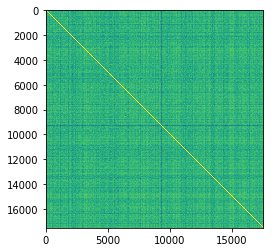

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(similarities)

In [29]:
def get_neighbors(fp, k):
    

AttributeError: 'Index' object has no attribute 'sample'

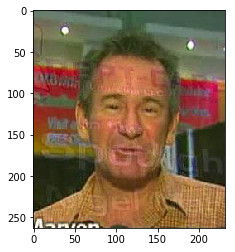

In [83]:
import random
random.seed(2994)
i = random.randint(0, embeddings.shape[0])
fp = embeddings.index[i]
im = Image.open(fp)
plt.imshow(im)


opening fp /projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/1/n003597/0138_01.jpg
opening fp /projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n000236/0053_01.jpg
opening fp /projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/1/n004959/0001_01.jpg
opening fp /projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/1/n004371/0047_01.jpg
opening fp /projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/1/n001525/0050_02.jpg


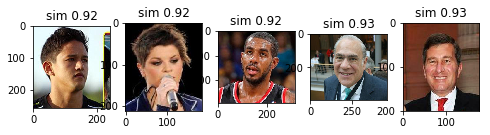

In [84]:
%matplotlib inline
k=5
# find neighbors; note that argsort sorts in ascending order, 
# so we take the last k elements (exlcluding the image itself as a neighbor)
nbrs = similarities[i,:].argsort()[-(k+1):-1]  
sims = similarities[i,nbrs]
nbrs = embeddings.index[nbrs]
fig = plt.figure(figsize=(8,8))
for count in range(1, k+1):
    ax = fig.add_subplot(1, k, count)
    fp = nbrs[count-1]
    print("opening fp {}".format(fp))
    im = Image.open(fp)
    ax.imshow(im)
    ax.set_title("sim %01.2f" % sims[count-1])